## <h2>Data exploration Adult dataset</h2>

<p>Dataset Description</p>
<ul>
<li>age: continuous.
<li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
<li>fnlwgt: continuous.
<li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<li>education-num: continuous.
<li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
<li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
<li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
<li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
<li>sex: Female, Male.
<li>capital-gain: continuous.
<li>capital-loss: continuous.
<li>hours-per-week: continuous.

</ul>


<p>Import libraries</p>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, math

<p>Read the dataset</p>

In [3]:
# Define the base path
base_path = os.getcwd()
# Define the data path
folder_data_path = '/../data/raw/'
# Define the file path
file_path = 'adult.data'
data_path = ''.join([base_path,folder_data_path, file_path])

In [4]:
# read the dataset
df = pd.read_csv(data_path, sep=',')
# Edit the columns names in the df
default_columns_name = df.columns.to_list()
columns_name = ['age','workclass','fnlwgt','education', 'education_num', 'marital_status','occupation',
                'relationship','race', 'sex','capital_gain','capital_loss','hours-per-week','native_country',
                'income']
# Became the default column to a row for pandas
new_row = dict(zip(columns_name, default_columns_name))
df.loc[len(df.index)] = default_columns_name
# assing the column names
df.columns = columns_name
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<p>Description of the dataset</p>

In [5]:
print(f"Dataframe original size: {df.shape}")
print(f"Dataframe columns description\n{df.dtypes}")

Dataframe original size: (32561, 15)
Dataframe columns description
age               object
workclass         object
fnlwgt            object
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain      object
capital_loss      object
hours-per-week    object
native_country    object
income            object
dtype: object


<p>Check missing values available</p>

In [6]:
df.isna().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

<p>Cast values of the columns</p>

In [7]:
# Declare columns name and its type to cast
columns_name_type = {'age':'int','workclass':'object','fnlwgt':'int','education':'object', 
                     'education_num':'int','marital_status':'object','occupation':'object',
                    'relationship':'object','race':'object', 'sex':'object','capital_gain':'float',
                    'capital_loss':'float','hours-per-week':'int','native_country':'object',
                    'income':'object'}
df = df.astype(columns_name_type)
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours-per-week      int64
native_country     object
income             object
dtype: object

<p>Split the dataset into numerical and object</p>

In [8]:
# use 
df_numerical = df.select_dtypes(include='number')
df_object = df.select_dtypes(exclude='number')

In [9]:
# Declare the numerical columns
columns_name_numerical = ['age','fnlwgt', 'education_num', 
                'capital_gain','capital_loss',
                'hours-per-week','income']
# Declare the object columns
columns_name_object = ['workclass','education', 
                       'marital_status','occupation',
                       'relationship','race', 'sex','native_country']


<h3>Display the histogram for the multiple columns</h3>
<p>First display the numerical values</p>

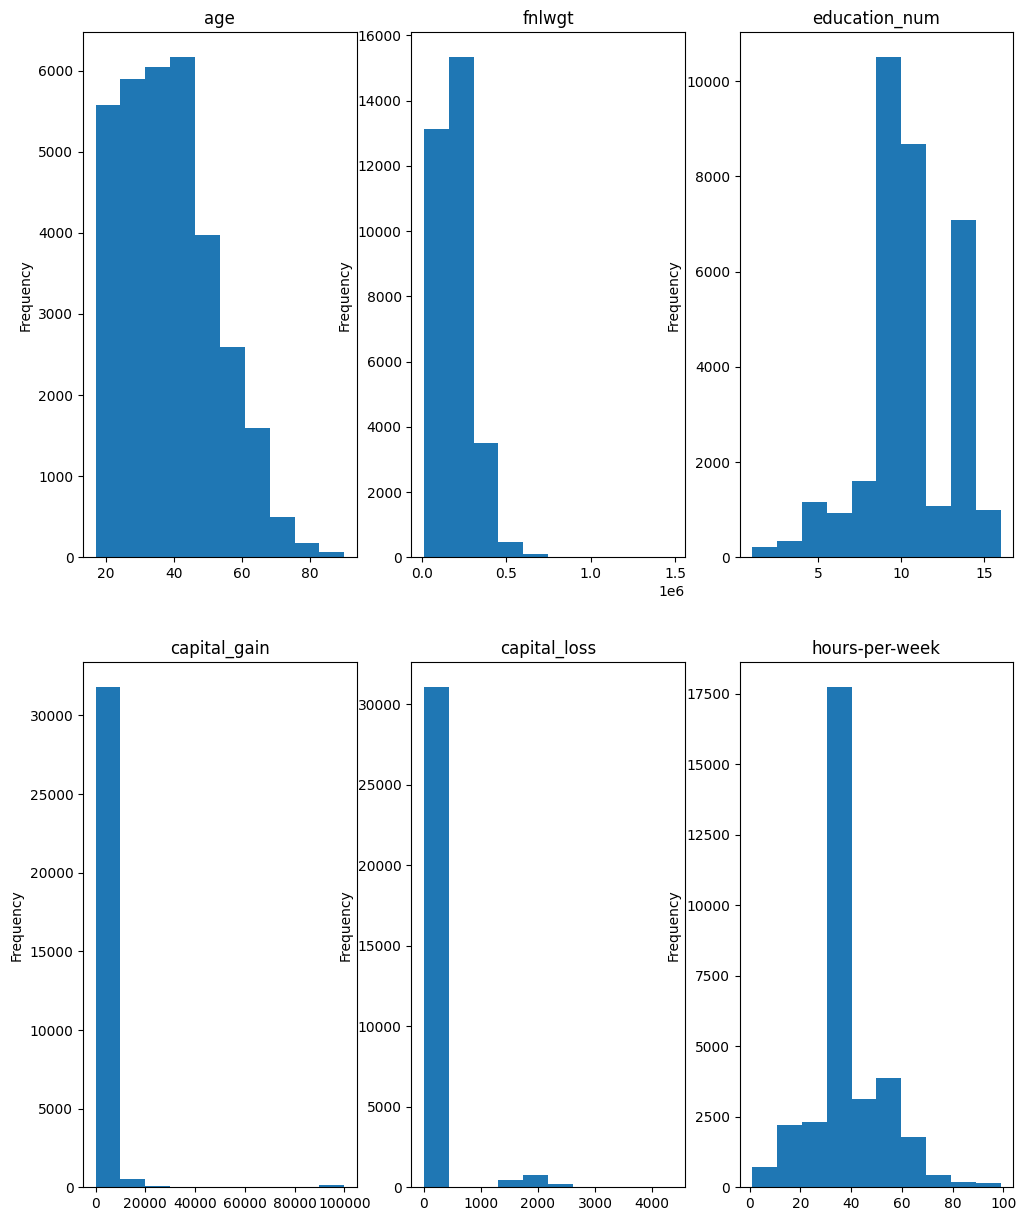

In [11]:
numerical_columns = df_numerical.columns.to_list() 
# instatiate the cols columns
ncols = 3
# Calculate the rows according to 
# the dataset columns
nrows = math.ceil(len(numerical_columns)/ncols) 
# Instantiate the matplotlib fig and axs
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15))
# Call in chunks of 5 to plot by row 
cnt_figures = 0
for row in range(nrows):
    for col in range(ncols):
        if cnt_figures >= len(numerical_columns):
            break
        temp_series = df_numerical[numerical_columns[cnt_figures]]
        temp_series.plot.hist(ax=axs[row,col])
        axs[row, col].set_title(numerical_columns[cnt_figures])
        cnt_figures +=1


<p>Display the categorical values</p>

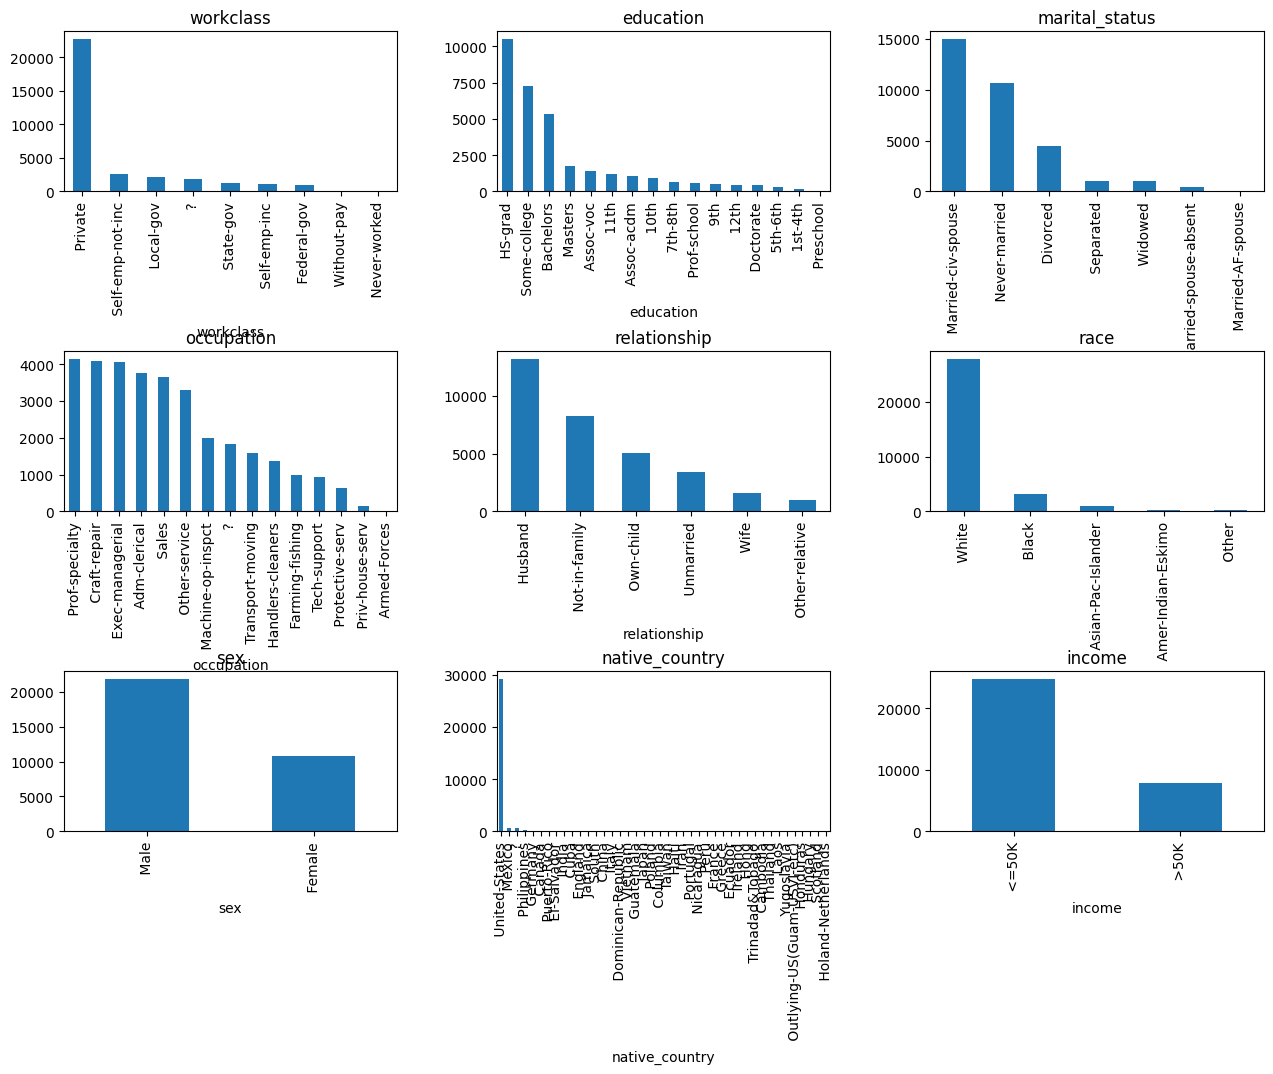

In [22]:
object_columns = df_object.columns.to_list() 
# instatiate the cols columns
ncols = 3
# Calculate the rows according to 
# the dataset columns
nrows = math.ceil(len(object_columns)/ncols) 
# Instantiate the matplotlib fig and axs
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,10))
# Call in chunks of 5 to plot by row 
cnt_figures = 0
for row in range(nrows):
    for col in range(ncols):
        if cnt_figures >= len(object_columns):
            break
        temp_series = df_object[object_columns[cnt_figures]]
        temp_bar_data = temp_series.value_counts()
        # display(temp_bar_data)
        temp_bar_data.plot.bar(ax=axs[row,col])
        axs[row, col].set_title(object_columns[cnt_figures])
        cnt_figures +=1

# Adjust spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=1)

<h2>Correlation variables</h2>
<p>Calculate the correlation matrix numerical values</p>

In [27]:
correlation_matrix = df_numerical.corr()
ticks_correlation = correlation_matrix.columns
correlation_matrix_numpy = correlation_matrix.to_numpy()
ticks_correlation

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours-per-week'],
      dtype='object')

<p>Create the plot representation</p>

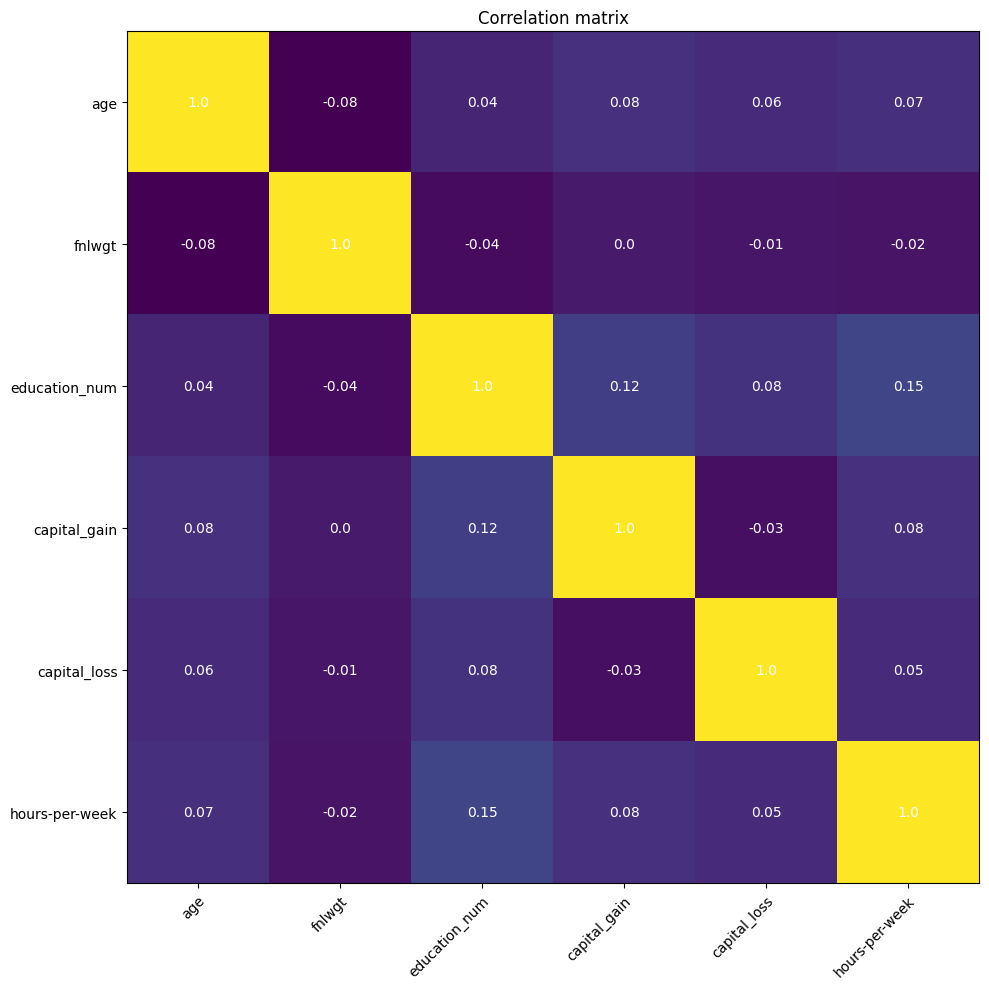

In [29]:
# instantiate the fig and ax
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(correlation_matrix)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(ticks_correlation)), labels=ticks_correlation)
ax.set_yticks(np.arange(len(ticks_correlation)), labels=ticks_correlation)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ticks_correlation)):
    for j in range(len(ticks_correlation)):
        text = ax.text(j, i, np.round(correlation_matrix_numpy[i, j], decimals=2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation matrix")
fig.tight_layout()